In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,precision_score,recall_score,f1_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df=pd.read_csv('IRIS.csv')

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.shape

(150, 5)

In [6]:
print("Number of Rows : ",df.shape[0])
print("Number of Columns : ",df.shape[1])

Number of Rows :  150
Number of Columns :  5


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
# Checking the dataset for any duplicated values
x=df.duplicated().sum()
print("Number of Duplicate Values : ",x)

Number of Duplicate Values :  3


In [9]:
# identification of Duplicate Values
duplicate=df.duplicated()
dup=df[duplicate]
print(dup)

     sepal_length  sepal_width  petal_length  petal_width         species
34            4.9          3.1           1.5          0.1     Iris-setosa
37            4.9          3.1           1.5          0.1     Iris-setosa
142           5.8          2.7           5.1          1.9  Iris-virginica


In [11]:
# Removal of Duplicate Values
data=df.drop_duplicates()
print(data)

     sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[147 rows x 5 columns]


In [14]:
# Finding Null Values 
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [15]:
# Checking the count of unique values for each variable
for i in df.columns:
    print(" No. of unique values in ",i," are ",df[i].nunique())

 No. of unique values in  sepal_length  are  35
 No. of unique values in  sepal_width  are  23
 No. of unique values in  petal_length  are  43
 No. of unique values in  petal_width  are  22
 No. of unique values in  species  are  3


In [16]:
# EDA- Exploratory Data Analysis

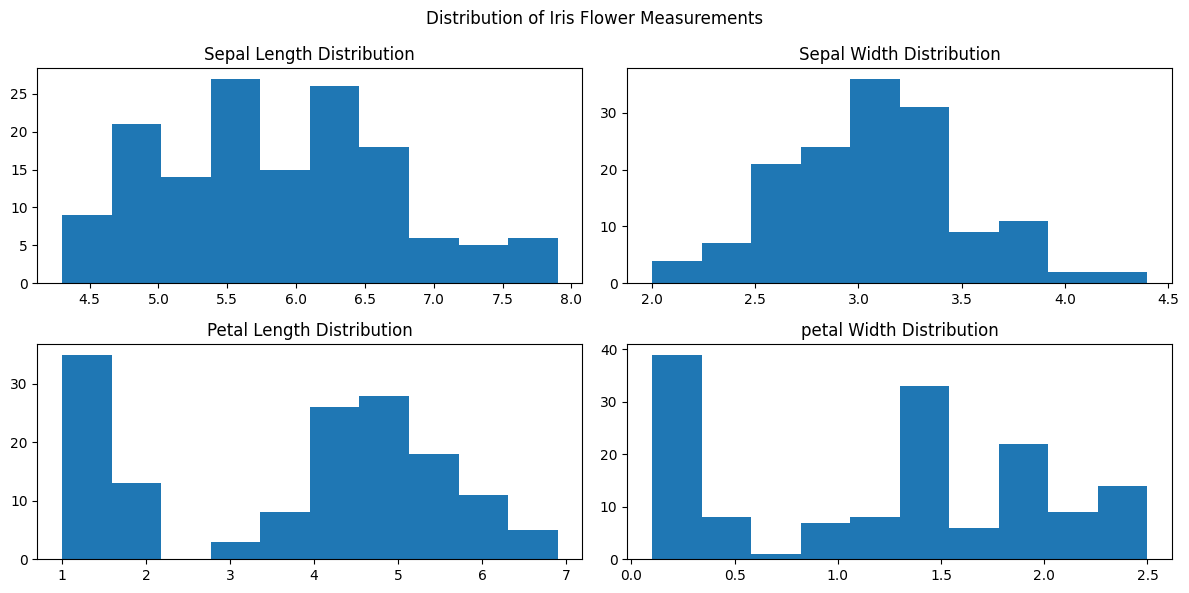

In [19]:
# Distribution of Numerical Variables
plt.figure(figsize=(12,6))
plt.suptitle("Distribution of Iris Flower Measurements")

# Creating 2*2 subplots
#Subplot-1
plt.subplot(2,2,1)
plt.hist(data['sepal_length'])
plt.title("Sepal Length Distribution")
#Subplot-2
plt.subplot(2,2,2)
plt.hist(data['sepal_width'])
plt.title('Sepal Width Distribution')
#Subplot -3
plt.subplot(2,2,3)
plt.hist(data['petal_length'])
plt.title('Petal Length Distribution')
#Subplot-4
plt.subplot(2,2,4)
plt.hist(data['petal_width'])
plt.title('petal Width Distribution')

# Displaying the subplots
plt.tight_layout()
plt.show()

In [20]:
colors=['red','yellow','green']
species=['Iris-setosa','Iris-versicolor','Iris-virginica']

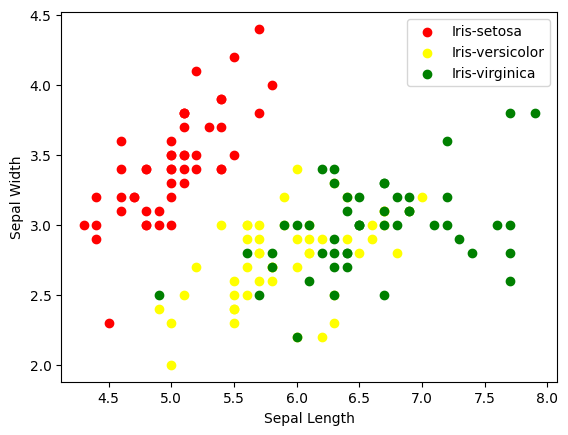

In [22]:
# Creating a scatter plot for Sepal Length vs Sepal Width for each Species
for i in range(3):
    x=data[data['species']==species[i]]
    plt.scatter(x['sepal_length'],x['sepal_width'],c=colors[i],label=species[i])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

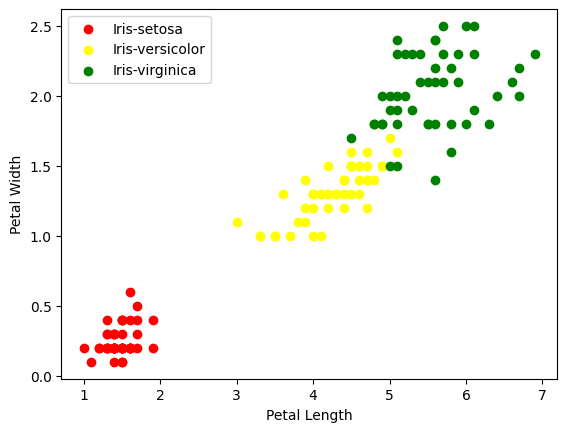

In [23]:
# Creating a scatter plot for Petal Length vs Petal Width for each Species
for i in range(3):
    x=data[data['species']==species[i]]
    plt.scatter(x['petal_length'],x['petal_width'],c=colors[i],label=species[i])
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.show()

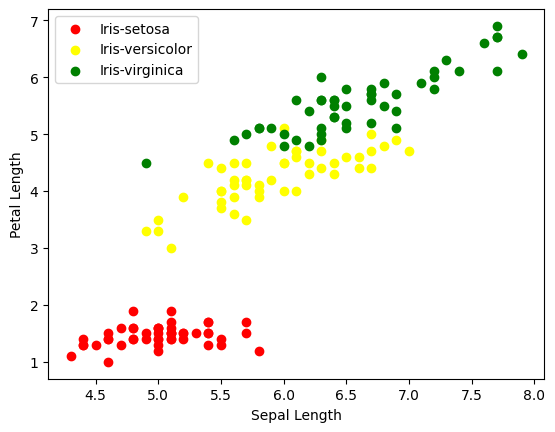

In [24]:
# Creating a scatter plot for Sepal Length vs Petal Length for each Species
for i in range(3):
    x=data[data['species']==species[i]]
    plt.scatter(x['sepal_length'],x['petal_length'],c=colors[i],label=species[i])
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend()
plt.show()

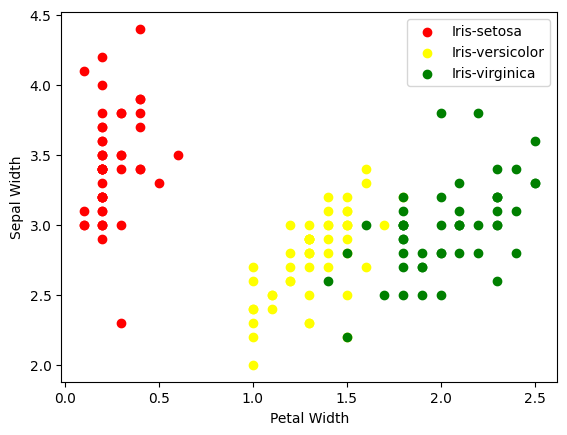

In [25]:
# Creating a scatter plot for Petal Width vs Sepal Width for each Species
for i in range(3):
    x=data[data['species']==species[i]]
    plt.scatter(x['petal_width'],x['sepal_width'],c=colors[i],label=species[i])
plt.xlabel('Petal Width')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

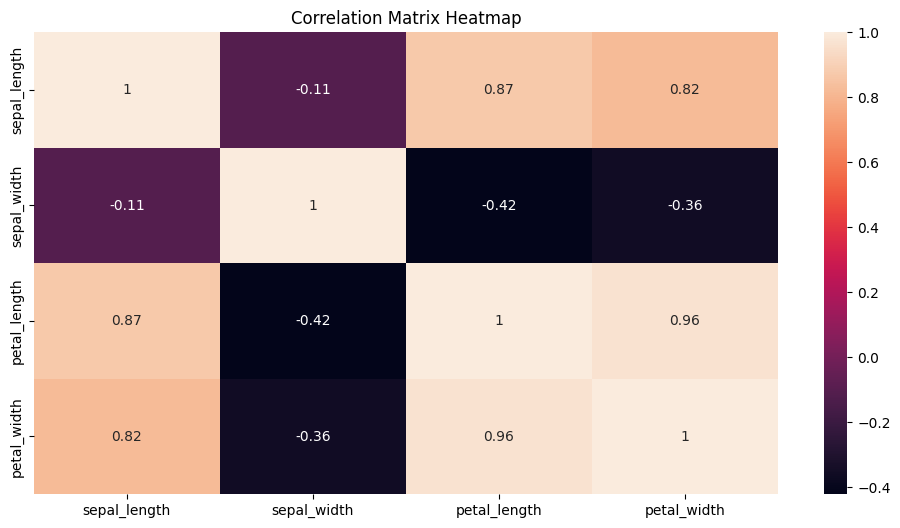

In [30]:
# Correlation Heatmap
plt.figure(figsize=(12,6))
dff=data.drop(['species'],axis=1)
sns.heatmap(dff.corr(),annot=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [38]:
# Categorial Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['species']=le.fit_transform(data['species'])
k=data['species'].unique()
print(" Encoded Species Values : ",k)

 Encoded Species Values :  [0 1 2]


In [40]:
# Data Scaling
x=data.drop(['species'],axis=1)
y=data['species']

In [80]:
# Splitting the data into training set and testing set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [81]:
# Various Model Analysis

In [82]:
# Model 1- Logistic Regression

 Training Accuracy of Logistic Regression is 0.9607843137254902
 Testing Accuracy of Logistic Regression is 1.0
 Confusion Matrix :- [[20  0  0]
 [ 0 14  0]
 [ 0  0 11]]
 Classification Report :-               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        11

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



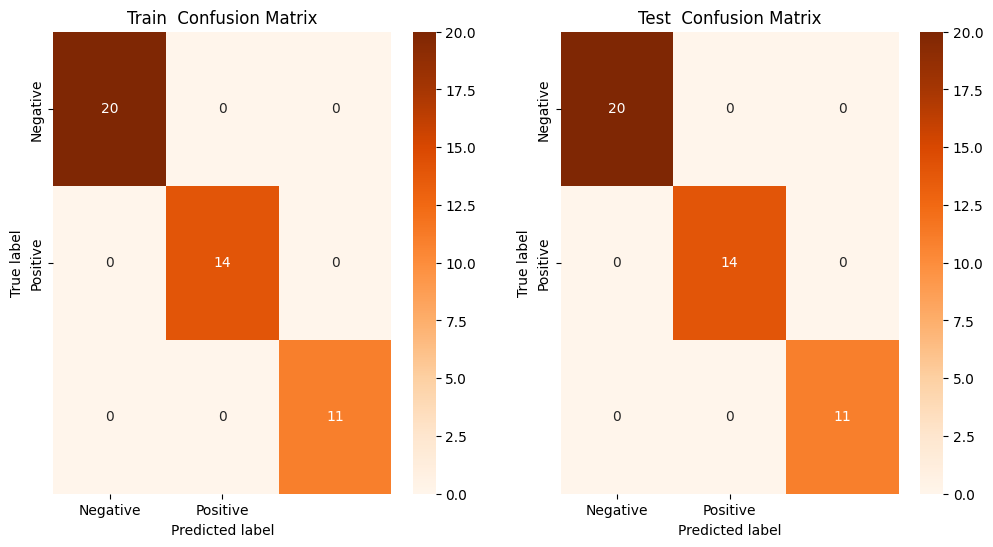

In [83]:
lg=LogisticRegression()
lg.fit(x_train,y_train)

acc_lg=accuracy_score(y_test,lg.predict(x_test))
# Accuracy matrix
print(f" Training Accuracy of Logistic Regression is {accuracy_score(y_train,lg.predict(x_train))}")
print(f" Testing Accuracy of Logistic Regression is {accuracy_score(y_test,lg.predict(x_test))}")

# Confusion Matrix
print(f" Confusion Matrix :- {confusion_matrix(y_test,lg.predict(x_test))}")
cm_lg=confusion_matrix(y_test,lg.predict(x_test))

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.heatmap(cm_lg,annot=True,xticklabels=['Negative','Positive'],yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g')
plt.title("Train  Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")

plt.subplot(1,2,2)
sns.heatmap(cm_lg,annot=True,xticklabels=['Negative','Positive'],yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g')
plt.title("Test  Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")

# Classification Report
print(f" Classification Report :- {classification_report(y_test,lg.predict(x_test))}")

In [43]:
# Model 2- KNN- K-Nearest Algorithm

Training Accuracy of KNN is 0.9803921568627451
Testing Accuracy of KNN is 0.9777777777777777
Confusion Matrix :- 
[[14  0  0]
 [ 0 17  1]
 [ 0  0 13]]

Classification Report :- 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.94      0.97        18
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45




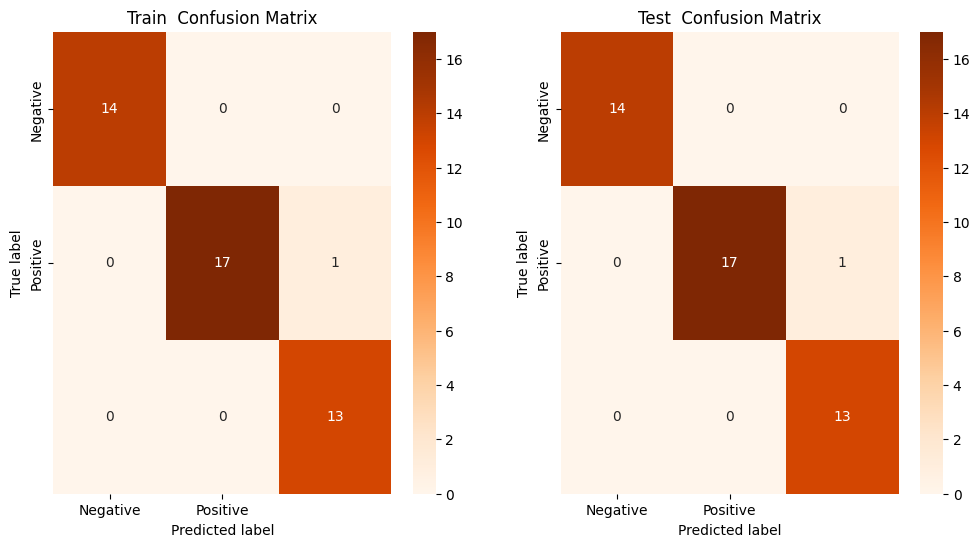

In [78]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

acc_knn=accuracy_score(y_test,knn.predict(x_test))
# Accuracy Score
print(f"Training Accuracy of KNN is {accuracy_score(y_train,knn.predict(x_train))}")
# Accuracy_score(actual data,predicted data)
print(f"Testing Accuracy of KNN is {accuracy_score(y_test,knn.predict(x_test))}")

# Confusion Matrix
print(f"Confusion Matrix :- \n{confusion_matrix(y_test,knn.predict(x_test))}\n")
cm_knn=confusion_matrix(y_test,knn.predict(x_test))

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.heatmap(cm_knn,annot=True,xticklabels=['Negative','Positive'],yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g')
plt.title("Train  Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")

plt.subplot(1,2,2)
sns.heatmap(cm_knn,annot=True,xticklabels=['Negative','Positive'],yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g')
plt.title("Test  Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")

# Classification Report
print(f"Classification Report :- \n{classification_report(y_test,knn.predict(x_test))}\n")

In [49]:
# Model 3- Desicion Tree Classifier

 Training Accuracy of Decision Tree Classifier is 1.0
 Testing Accuracy of Decision Tree Classifier is 0.9555555555555556
 Confusion Matrix : [[14  0  0]
 [ 0 17  1]
 [ 0  1 12]]
 Classification Report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        18
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



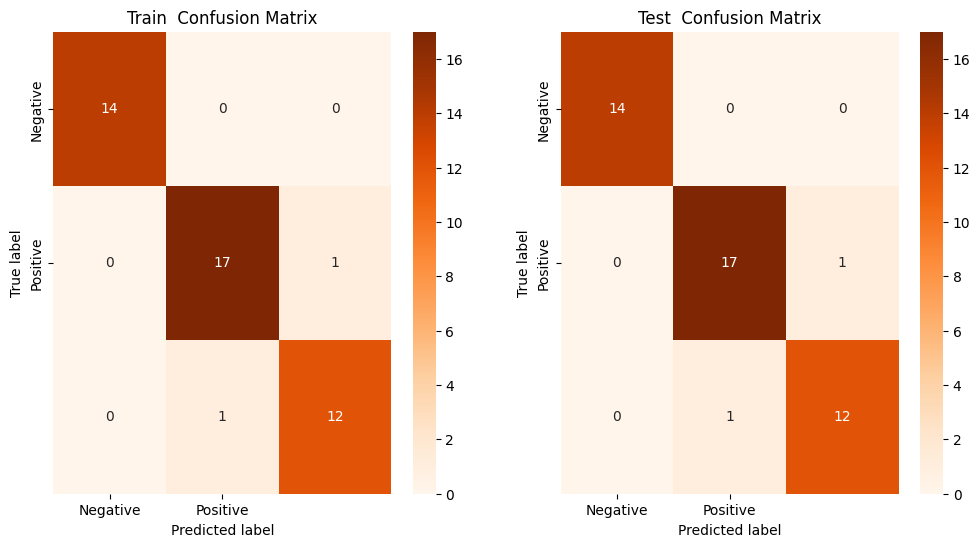

In [77]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)

acc_dtc=accuracy_score(y_test,dtc.predict(x_test))
# Accuracy Matrix
print(f" Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train,dtc.predict(x_train))}")
print(f" Testing Accuracy of Decision Tree Classifier is {accuracy_score(y_test,dtc.predict(x_test))}")

# Confusion Matrix
print(f" Confusion Matrix : {confusion_matrix(y_test,dtc.predict(x_test))}")
cm_dtc=confusion_matrix(y_test,dtc.predict(x_test))

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.heatmap(cm_dtc,annot=True,xticklabels=['Negative','Positive'],yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g')
plt.title("Train  Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")

plt.subplot(1,2,2)
sns.heatmap(cm_dtc,annot=True,xticklabels=['Negative','Positive'],yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g')
plt.title("Test  Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")

# Classification Report
print(f" Classification Report : {classification_report(y_test,dtc.predict(x_test))}")

In [51]:
# Model 4- Random Forest Classifier

 Training Accuracy of Random Forest Classifier is 1.0
 Testing Accuracy of Random Forest Classifier is 0.9777777777777777
 Confusion Matrix :- [[14  0  0]
 [ 0 17  1]
 [ 0  0 13]]
 Classification Report :-               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.94      0.97        18
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



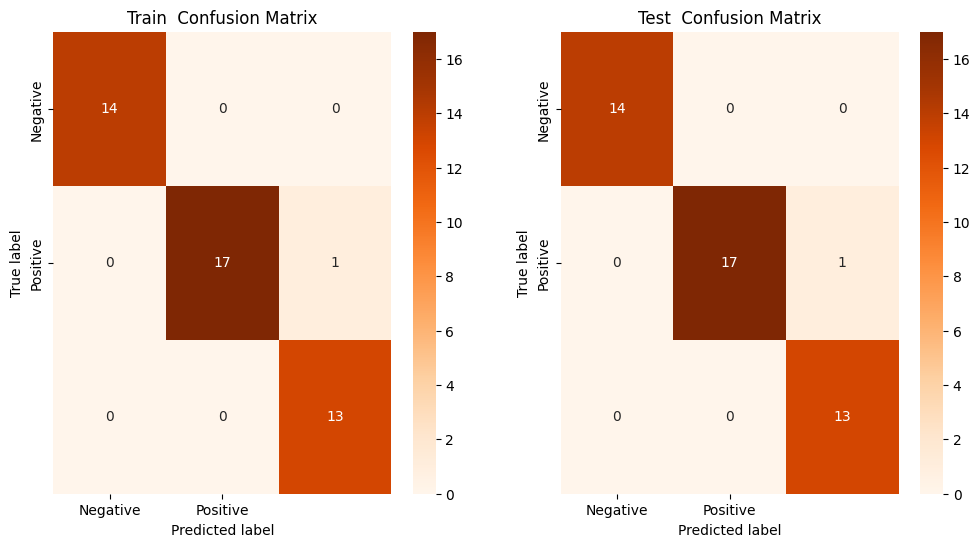

In [76]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

acc_rfc=accuracy_score(y_test,rfc.predict(x_test))
# Accuracy matrix
print(f" Training Accuracy of Random Forest Classifier is {accuracy_score(y_train,rfc.predict(x_train))}")
print(f" Testing Accuracy of Random Forest Classifier is {accuracy_score(y_test,rfc.predict(x_test))}")

# Confusion Matrix
print(f" Confusion Matrix :- {confusion_matrix(y_test,rfc.predict(x_test))}")
cm_rfc=confusion_matrix(y_test,rfc.predict(x_test))

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.heatmap(cm_rfc,annot=True,xticklabels=['Negative','Positive'],yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g')
plt.title("Train  Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")

plt.subplot(1,2,2)
sns.heatmap(cm_rfc,annot=True,xticklabels=['Negative','Positive'],yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g')
plt.title("Test  Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")

# Classification Report
print(f" Classification Report :- {classification_report(y_test,rfc.predict(x_test))}")

In [54]:
# Model 5- SVC ( Support Vector Machine)

 Training Accuracy of Support Vector Machine is 0.9607843137254902
 Testing Accuracy of Support Vector Machine is 1.0
 Confusion Matrix :- [[20  0  0]
 [ 0 14  0]
 [ 0  0 11]]


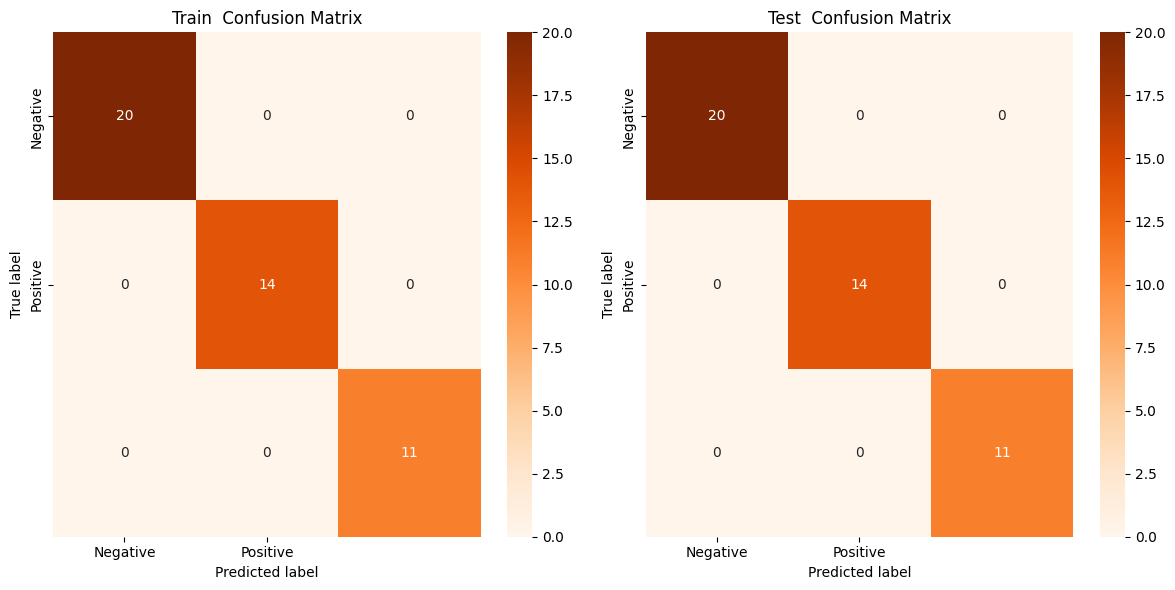

 Classification Report :-               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        11

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [84]:
svc=SVC()
svc.fit(x_train,y_train)

acc_svc=accuracy_score(y_test,svc.predict(x_test))
# Accuracy matrix
print(f" Training Accuracy of Support Vector Machine is {accuracy_score(y_train,svc.predict(x_train))}")
print(f" Testing Accuracy of Support Vector Machine is {accuracy_score(y_test,svc.predict(x_test))}")

# Confusion Matrix
print(f" Confusion Matrix :- {confusion_matrix(y_test,svc.predict(x_test))}")
cm_svc=confusion_matrix(y_test,svc.predict(x_test))

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.heatmap(cm_svc,annot=True,xticklabels=['Negative','Positive'],yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g')
plt.title("Train  Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")

plt.subplot(1,2,2)
sns.heatmap(cm_svc,annot=True,xticklabels=['Negative','Positive'],yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g')
plt.title("Test  Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")

plt.tight_layout()
plt.show()

# Classification Report
print(f" Classification Report :- {classification_report(y_test,svc.predict(x_test))}")

In [85]:
# Model Comparison

In [86]:
models=pd.DataFrame({'Model':['Logistic Regression','KNN','Decision Tree Classifier','Random Forest Classifier','Support Vector Machine'], 
                     'Score':[acc_lg,acc_knn,acc_dtc,acc_rfc,acc_svc]}) 
models.sort_values(by='Score',ascending=False)

,Model,Score
0,Logistic Regression,1.000000
4,Support Vector Machine,1.000000
1,KNN,0.977778
3,Random Forest Classifier,0.977778
2,Decision Tree Classifier,0.955556


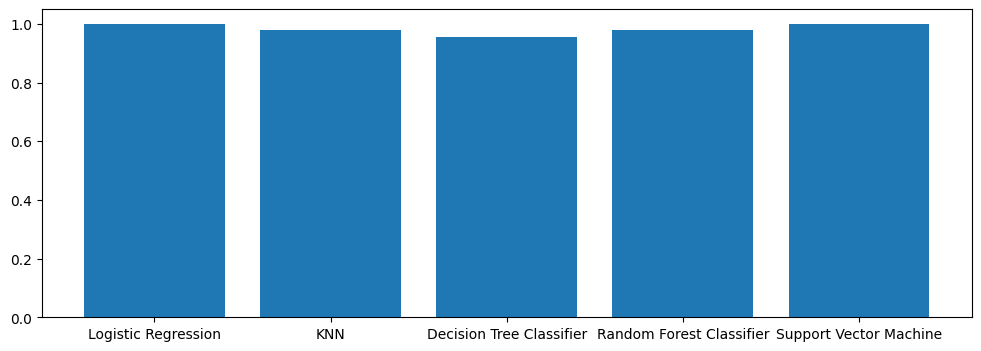

In [99]:
plt.figure(figsize=(12,4))
plt.bar(models['Model'],models['Score'])
plt.show()